In [2]:
import iris
import iris.quickplot as qplt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import itertools
marker = itertools.cycle((',', '+', '.', 'o', '*')) 


/Users/ph290/miniconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [3]:
ts_data = pd.read_csv('ts_locations.txt',names = ['name','loc','lat','lon','dates','link','notes'],header=0)

In [4]:
bathy_file = '/Users/ph290/Downloads/ETOPO1_Bed_g_gmt4_low_res.nc'
bathy_cube = iris.load_cube(bathy_file)
bathy_cube.data = np.ma.masked_where(bathy_cube.data >= 0.0,bathy_cube.data)
bathy_cube.data = np.ma.masked_where(bathy_cube.data < -200.0,bathy_cube.data)


# bathy_cube.data[np.where(bathy_cube.data > 0.0)]

/Users/ph290/miniconda2/lib/python2.7/site-packages/iris/fileformats/cf.py:1143: IrisDeprecation: NetCDF default loading behaviour currently does not expose variables which define reference surfaces for dimensionless vertical coordinates as independent Cubes. This behaviour is deprecated in favour of automatic promotion to Cubes. To switch to the new behaviour, set iris.FUTURE.netcdf_promote to True.
  warn_deprecated(msg)


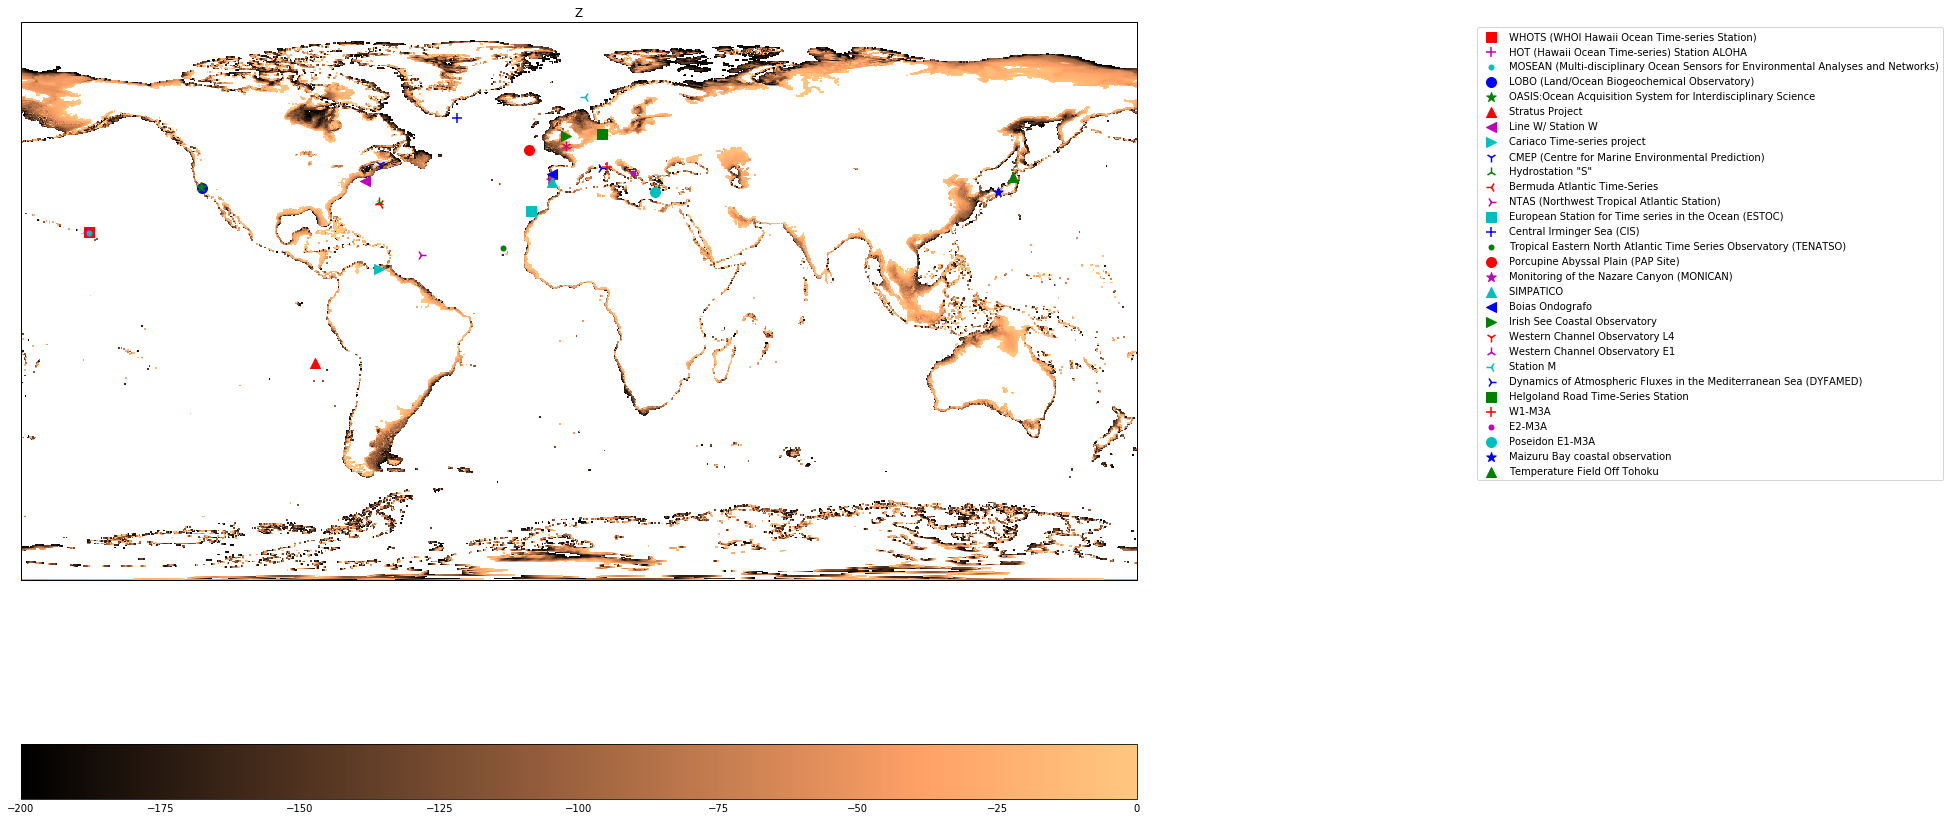

In [8]:
fig = plt.figure(figsize=(20, 20))
qplt.pcolormesh(bathy_cube,vmin=-200,vmax=0,cmap='copper')

marker = itertools.cycle((',', '+', '.', 'o', '*','^','<','>','1','2','3','4')) 
color = itertools.cycle(('r','m','c','b','g'))  
    
for i in range(len(ts_data.lon)):
    plt.scatter(ts_data.lon[i],ts_data.lat[i],c=color.next(),marker = marker.next(),s=100,label= ts_data.name[i])


plt.legend(bbox_to_anchor=(1.3, 1.0))


In [ ]:
ts_data